# Learning Linear Regression

So I decided to learn about the main aspects of
some of the most used machine learning models.

Starting simple, the first model I wanna Learn about is
**Linear Regression**, which is simpler compared to other models.

## What is Linear Regression?

Linear regression is a statistical method used to model
the relationship between a dependent variable and one or
more independent variables by fitting a linear equation
to the observed data. Making it sounds more simple,
its a weighted sum of input values plus a bias value,
which maps to a prediction.

`Y = β₀ + β₁X + ε`

The simplicity of Linear Regression what makes it be
largely used in business, as its a cheaper and faster to
implement tool for specially for trend understanding, for
understanding correlations and the impact of variables on 
a independent variable, as the association between
variables.

With good data, it can be all you need to understand a
business problem.

## Limitations of Linear Regression

TODO

### Obtaining data

For data, I wasn't able to choose any database, so I decided to
just generate some **synthetic data**, as this is just a learning
purpose experiment. Also *Synthetic Data Generation* is a area
that has catch my attention recently, so I'll probably write more
about any soon.

So, the cells bellow are able are responsible for generating a dataset
which can be modeled by a linear regressor. We have a class with some
useful parameters like how many columns we want in the dataset, for example,
in case you want to generate a dataset for multiple linear regression.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    os.makedirs("datasets")
except FileExistsError:
    pass


C:\Users\natan\AppData\Local\Temp\ipykernel_12820\2829726482.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.datasets import make_regression

class SyntheticDataGenerator:
    def __init__(self, n_samples=100, n_features=1, noise=0.0, random_state=None):
        self.n_samples = n_samples
        self.n_features = n_features
        self.noise = noise
        self.random_state = random_state
        self.X = None
        self.y = None

    def generate_data(self):
        self.X, self.y = make_regression(
            n_samples=self.n_samples,
            n_features=self.n_features,
            noise=self.noise,
            random_state=self.random_state
        )

    def save_data_to_file(self, file_path, append=False):
        data = pd.DataFrame(
            np.hstack((self.X, self.y.reshape(-1, 1))), 
            columns=[f"X{i}" for i in range(self.n_features)] + ['y']
        )
        mode = 'a' if append else 'w'
        header = append is False
        data.to_csv(file_path, mode=mode, header=header, index=False)


I organized the generation parameters so We can easily modify if needed.

In [3]:
dataset1_parameters = {
    'n_samples': 10000,
    'n_features': 1,
    'noise': 8,
    'file_path': 'datasets/synthetic_data_1.csv',
    'color': ['orange']
}

In [4]:
data_generator = SyntheticDataGenerator(
    n_samples=dataset1_parameters['n_samples'], 
    n_features=dataset1_parameters['n_features'],
    noise=dataset1_parameters['noise'])

data_generator.generate_data()

## This line writes the data to a file.
## Leave it commented so you don't overwrite your data accidentally
## by running "run all cells"

# data_generator.save_data_to_file(dataset1_parameters['file_path'])

Congratulations, you just created your own synthetic dataset.

## Visualizing the data

Now we can view some random samples from this synthetic dataset:

In [5]:
df = pd.read_csv(dataset1_parameters['file_path'])

df.sample(5)

,X0,y
8934,-1.288285,-103.194112
5703,-0.705401,-46.722020
3851,0.506168,44.869758
7865,-1.276436,-88.898402
65,-0.473904,-36.476750


In [6]:
df.describe()

,X0,y
count,10000.000000,10000.000000
mean,0.002072,0.207728
std,0.998829,72.740408
min,-3.394498,-247.122195
25%,-0.659051,-48.144445
50%,-0.005143,-0.335417
75%,0.674900,48.654308
max,3.944751,288.983263


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


we can also plot this data to see how it behaves

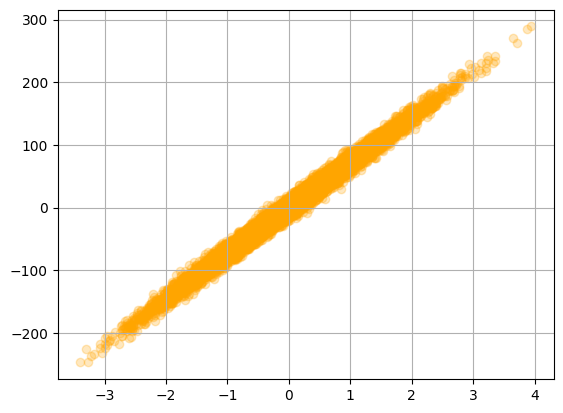

In [8]:
plt.scatter(x=df['X0'], y=df['y'], color=dataset1_parameters['color'], alpha=0.25)
plt.grid()
plt.show()

Linear data tends to be simple for humans to understand. We're able to notice
the "linear behavior".

In this case we have a positive correlation between `X0` and `y`.

## Training your first linear regressor

### Train and test data

In [9]:
from sklearn.model_selection import train_test_split

X = df['X0']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train = np.array(X_train).reshape((-1, 1))
X_test = np.array(X_test).reshape((-1, 1))
y_train = np.array(y_train).reshape((-1, 1))
y_test = np.array(y_test).reshape((-1, 1))

### Baseline

Its always good to have a point of caparison before starting doing a machine
learning model. This is because, if our model performs too well when its not
even trained, maybe this is a problem that doesn't need data modeling or
intelligent algorithms to be solved.

In [10]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

baseline_regressor = DummyRegressor(strategy='constant', constant=1)

baseline_regressor.fit(X_train, y_train)

baseline_predictions = baseline_regressor.predict(X_train)

mse = mean_squared_error(y_train, baseline_predictions)
r2 = r2_score(y_train, baseline_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 5186.557132910034
R² Score: -0.0001993523684509224


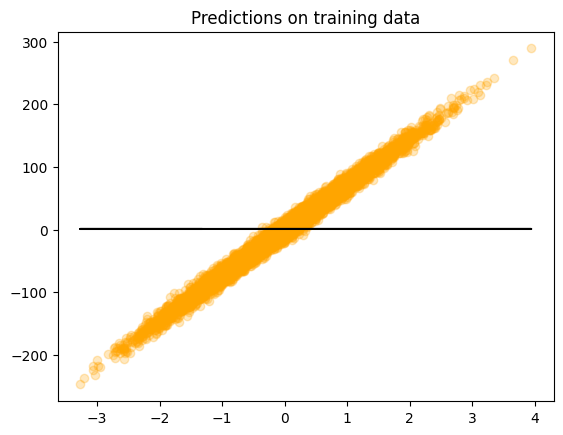

In [11]:
plt.scatter(X_train, y_train, color=dataset1_parameters['color'], alpha=0.25)
plt.plot(X_train, baseline_predictions, c='black')
plt.title('Predictions on training data')
plt.show()

#### Mean Square error and Quadratic Error

⚠️ TODO ⚠️

### Training a regressor

In [12]:
regressor_1 = LinearRegression().fit(X_train, y_train)

training_predictions = regressor_1.predict(X=X_train)

mse = mean_squared_error(y_train, training_predictions)
r2 = r2_score(y_train, training_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 62.85024202928055
R² Score: 0.9878796724372307


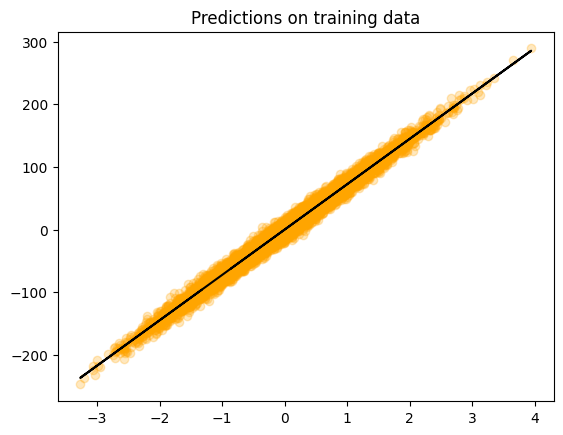

In [13]:
plt.scatter(X_train, y_train, color=dataset1_parameters['color'], alpha=0.25)
plt.plot(X_train, training_predictions, c='black')
plt.title('Predictions on training data')
plt.show()

In [14]:
test_predictions = regressor_1.predict(X=X_test)

mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 64.99262516371488
R² Score: 0.9881911930000618


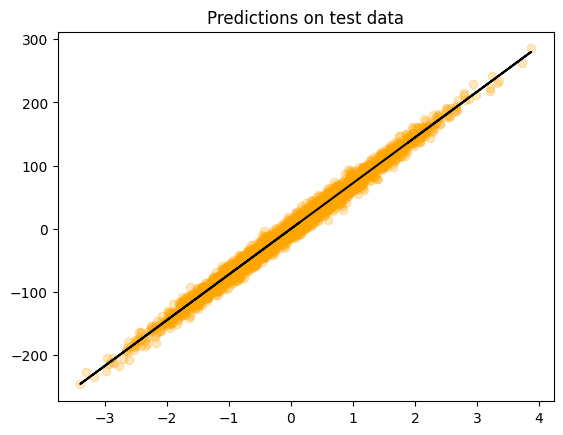

In [15]:
plt.scatter(X_test, y_test, color=dataset1_parameters['color'], alpha=0.25)
plt.plot(X_test, test_predictions, c='black')
plt.title('Predictions on test data')
plt.show()

You may think this is too easy. And you're right.

The thing is, the dataset is big enough for the model to easily understand the
internal logic of the data and the noise is too small, so it doesn't really
disturb our model during fitting stage.

This only proves how having lots of good data available makes our work easy.
But, as you may think i'm cheating, let make another example. This time, with
less data and more noise, more similar with the real world data.

### Modeling less data

In [16]:
dataset2_parameters = {
    'n_samples': 300,
    'n_features': 1,
    'noise': 124,
    'file_path': 'datasets/synthetic_data_2.csv',
    'color': ['indigo']
}

In [17]:
data_generator = SyntheticDataGenerator(
    n_samples=dataset2_parameters['n_samples'], 
    n_features=dataset2_parameters['n_features'],
    noise=dataset2_parameters['noise'])

data_generator.generate_data()

## This line writes the data to a file.
## Leave it commented so you don't overwrite your data accidentally
## by running "run all cells"

# data_generator.save_data_to_file(dataset2_parameters['file_path'])

In [18]:
df2 = pd.read_csv(dataset2_parameters['file_path'])

df2.sample(5)

,X0,y
262,0.851555,191.329136
143,0.178007,26.147675
0,-1.871947,-179.154306
290,-0.755117,-179.209855
105,0.094104,24.745308


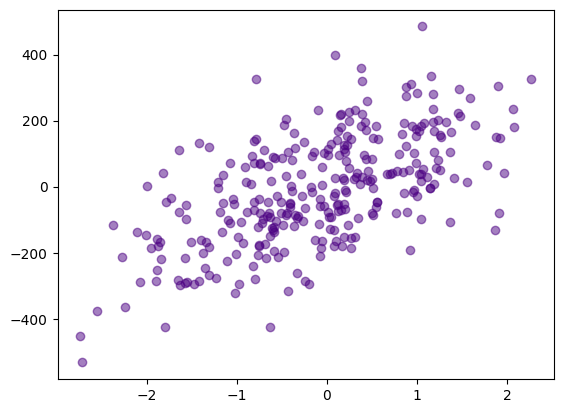

In [28]:
plt.scatter(x=df2['X0'], y=df2['y'], color=dataset2_parameters['color'], alpha=0.5)
plt.grid()
plt.show()

Notice how our data looks way more sparse now. We still can see the trend, a
positive correlation between our variables.

In [20]:
X2 = df2['X0']
y2 = df2['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33)

X_train2 = np.array(X_train2).reshape((-1, 1))
X_test2 = np.array(X_test2).reshape((-1, 1))
y_train2 = np.array(y_train2).reshape((-1, 1))
y_test2 = np.array(y_test2).reshape((-1, 1))

In [21]:
baseline_regressor2 = DummyRegressor(strategy='constant', constant=1)

baseline_regressor2.fit(X_train2, y_train2)

baseline_predictions2 = baseline_regressor.predict(X_train2)

mse = mean_squared_error(y_train2, baseline_predictions2)
r2 = r2_score(y_train2, baseline_predictions2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 27119.929937173692
R² Score: -0.007285526672892173


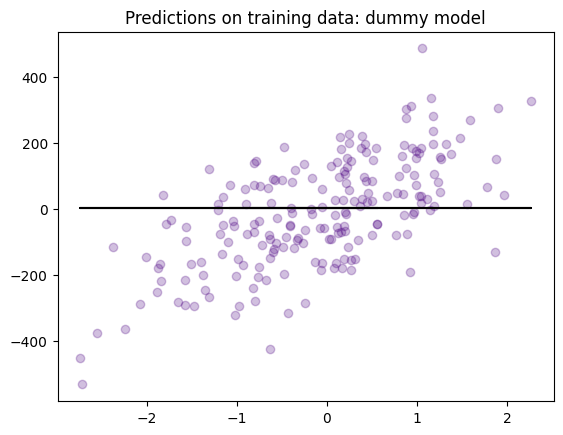

In [27]:
plt.scatter(X_train2, y_train2, color=dataset2_parameters['color'], alpha=0.25)
plt.plot(X_train2, baseline_predictions2, c='black')
plt.title('Predictions on training data: dummy model')
plt.show()

In [23]:
regressor_2 = LinearRegression().fit(X_train2, y_train2)

training_predictions_2 = regressor_1.predict(X=X_train2)

mse = mean_squared_error(y_train2, training_predictions_2)
r2 = r2_score(y_train2, training_predictions_2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 16845.021473575907
R² Score: 0.3743440205732558


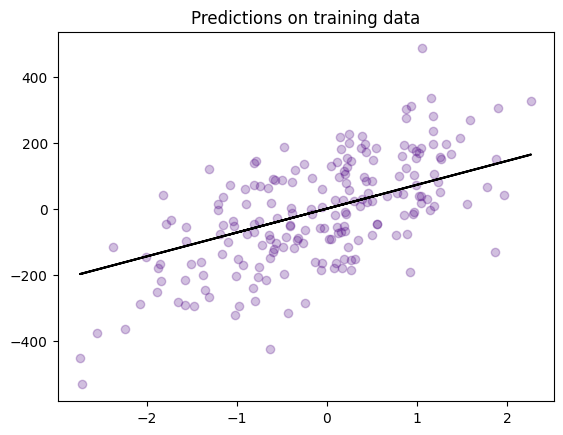

In [24]:
plt.scatter(X_train2, y_train2, color=dataset2_parameters['color'], alpha=0.25)
plt.plot(X_train2, training_predictions_2, c='black')
plt.title('Predictions on training data')
plt.show()

In [25]:
test_predictions2 = regressor_2.predict(X=X_test2)

mse = mean_squared_error(y_test2, test_predictions2)
r2 = r2_score(y_test2, test_predictions2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 20756.511936153514
R² Score: 0.2799355497359334


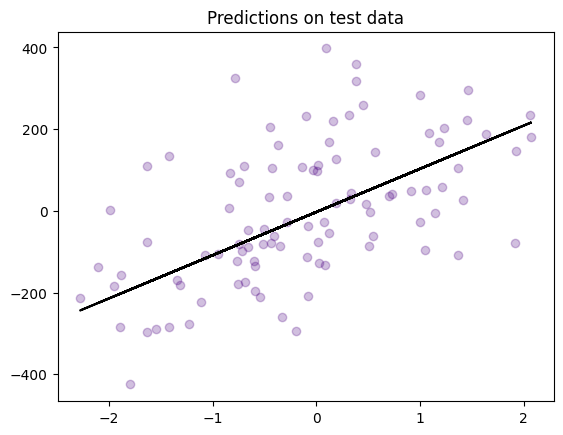

In [26]:
plt.scatter(X_test2, y_test2, color=dataset2_parameters['color'], alpha=0.25)
plt.plot(X_test2, test_predictions2, c='black')
plt.title('Predictions on test data')
plt.show()

# References

* [Life with data | How to create a baseline regression model](https://lifewithdata.com/2022/03/22/how-to-create-a-baseline-regression-model-in-scikit-learn/)

* [Sci-kit learn documentation | LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [Sci-kit learn documentation | train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

* [scribbr: Simple Linear Regression | An Easy Introduction & Examples](https://www.scribbr.com/statistics/simple-linear-regression/)

* [scribbr: Multiple Linear Regression | A Quick Guide (Examples)](https://www.scribbr.com/statistics/multiple-linear-regression/)

* [Statistics easily | Linear regression with sci-kit learn](https://statisticseasily.com/linear-regression-with-scikit-learn/)